In [1]:
import os
import pickle
from matplotlib import pyplot as plt
log_name = [r'E:\Juyue\tmp_conv_replicate_']

In [2]:
class jy_summary:
    def __init__(self, max_step):
        self.accurarcy = np.zeros(max_step)
        self.entropy = np.zeros(max_step)
        self.confusion_matrix = [None for ii in range(max_step)]
        self.learning_rate = np.zeros(max_step)
        self.step = np.zeros(max_step)
    def update(self, which_step, accuracy_value, entropy_value, confusion_matrix_value,learning_rate_value):
        self.step = which_step
        self.accurarcy[which_step] = accuracy_value
        self.entropy[which_step] = entropy_value
        self.confusion_matrix[which_step] = confusion_matrix_value
        self.learning_rate[which_step] = learning_rate_value
    def save(self, directory):
        with open(directory, 'wb') as f:
            pickle.dump(self, f)
    def load(self, directory):
        with open(directory, 'rb') as f:
            last_point = pickle.load(f)
        # assign value from last point to current point.
        last_time_max_step = last_point.step
        self.step = last_time_max_step
        self.accurarcy[0:last_time_max_step] = last_point.accurarcy[0:last_time_max_step]
        self.entropy[0:last_time_max_step] = last_point.entropy[0:last_time_max_step]
        self.confusion_matrix[0:last_time_max_step] = last_point.confusion_matrix[0:last_time_max_step]
        self.learning_rate[0:last_time_max_step] = last_point.learning_rate[0:last_time_max_step]


In [3]:
batch_norm_list = [0, 1]
label_count_list = [10, 28]
pickle_name_list = ['train', 'validation','test']
# train

In [4]:
train_accuracy = []
test_accuracy = []
for label_count in label_count_list:
    for batch_norm in batch_norm_list:


        log_folder_this = log_name[0] + str(label_count) + '_' + str(batch_norm)
        train_path_this = os.path.join(log_folder_this, 'retrain_logs', 'conv_' + pickle_name_list[0] + '.pickle')
        validation_path_this = os.path.join(log_folder_this, 'retrain_logs', 'conv_' + pickle_name_list[1] + '.pickle')
        with open(train_path_this, 'rb') as f:
            train = pickle.load(f)
        with open(validation_path_this, 'rb') as f:
            validation = pickle.load(f)
        print(train.step)
        print(validation.step)
        train_accuracy.append(train.accurarcy)
        test_accuracy.append(validation.accurarcy)


2099
2099
2099
2099
2099
2099
2099
2099


In [5]:
train.step

2099

In [5]:
%matplotlib inline

In [6]:

import numpy

def smooth(x,window_len=11,window='hanning'):

    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y



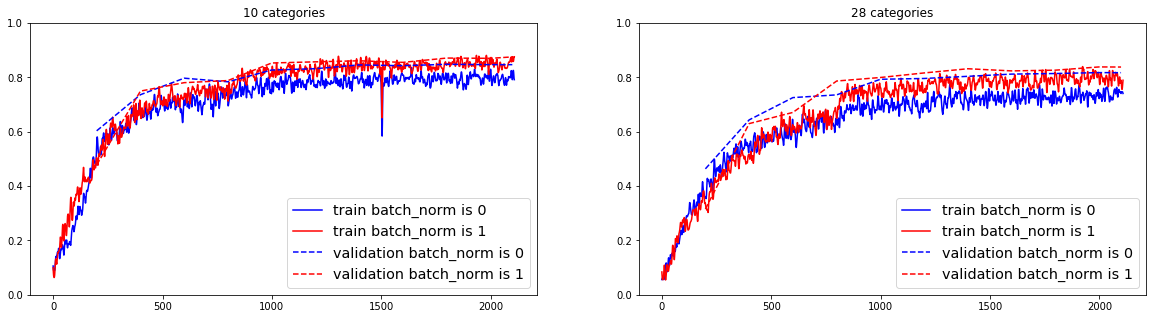

In [9]:

import numpy as np
step= np.nonzero(test_accuracy[0])
step = step[0]

window_size = 10
train_smooth = [smooth(train_accuracy_this, window_len=window_size) for train_accuracy_this in train_accuracy ]
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1,2,1)
ax.plot(train_smooth[0], 'b', label = 'train batch_norm is 0 ')
ax.plot(train_smooth[1], 'r', label = 'train batch_norm is 1')
ax.plot(step, test_accuracy[0][step], 'b--', label = 'validation batch_norm is 0')
ax.plot(step, test_accuracy[1][step], 'r--', label = 'validation batch_norm is 1')

legend = ax.legend(loc='lower right', shadow=False, fontsize='x-large')
ax.set_title('10 categories')
ax.set_ylim([0, 1])

ax = plt.subplot(1,2,2)
ax.plot(train_smooth[2], 'b',label = 'train batch_norm is 0')
ax.plot(train_smooth[3], 'r', label = 'train batch_norm is 1')
ax.plot(step, test_accuracy[2][step], 'b--', label = 'validation batch_norm is 0')
ax.plot(step, test_accuracy[3][step], 'r--', label = 'validation batch_norm is 1')
ax.set_title('28 categories')
ax.set_ylim([0, 1])
# ax.plot(validation.accurarcy)
legend = ax.legend(loc='lower right', shadow=False, fontsize='x-large')




In [10]:
train_accuracy[3][-10:-1]

array([ 0.86000001,  0.69      ,  0.75999999,  0.76999998,  0.86000001,
        0.81999999,  0.72000003,  0.79000002,  0.72000003])